In [69]:
import pandas as pd
import json
import os
from os import walk
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mypath="spotify_million_playlist_dataset/data/"
filenames = next(walk(mypath), (None, None, []))[2]  # [] if no file

In [5]:
playlist_frames=[]
track_frames=[]

In [6]:
for file_t in filenames:
    #filepath="spotify_million_playlist_dataset/data/" + file_t
    #a_file = open(filepath,"r")
    #list_of_lines = a_file.readlines()
    #list_of_lines[1]="\n"
    #list_of_lines[5]=",\n"
    #a_file.close()
    
    end_filepath="spotify_million_playlist_dataset/data/moded" + file_t
    a_file = open(end_filepath, "w")
    a_file.writelines(list_of_lines)
    a_file.close()
    
    with open(end_filepath) as json_file:
        data = json.load(json_file)
    
    df=pd.DataFrame(data)
    playlist_df = pd.json_normalize(df["playlists"])
    playlist_frames.append(playlist_df)
    track_list=playlist_df['tracks'].sum()
    track_df=pd.DataFrame(track_list)
    track_frames.append(track_df)

In [8]:
len(playlist_frames)

1000

In [9]:
all_tracks=pd.concat(track_frames)

In [37]:
len(all_tracks)

66346428

In [197]:
all_tracks['songs_duration_minutes']=(all_tracks['duration_ms']/1000)/60

In [11]:
all_playlists=pd.concat(playlist_frames)

In [12]:
all_playlists 

,name,collaborative,pid,modified_at,num_tracks,num_albums,num_followers,tracks,num_edits,duration_ms,num_artists,description
0,Throwbacks,false,0,1493424000,52,47,1,"[{'pos': 0, 'artist_name': 'Missy Elliott', 't...",6,11532414,37,NaN
1,Awesome Playlist,false,1,1506556800,39,23,1,"[{'pos': 0, 'artist_name': 'Survivor', 'track_...",5,11656470,21,NaN
2,korean,false,2,1505692800,64,51,1,"[{'pos': 0, 'artist_name': 'Hoody', 'track_uri...",18,14039958,31,NaN
3,mat,false,3,1501027200,126,107,1,"[{'pos': 0, 'artist_name': 'Camille Saint-Saën...",4,28926058,86,NaN
4,90s,false,4,1401667200,17,16,2,"[{'pos': 0, 'artist_name': 'The Smashing Pumpk...",7,4335282,16,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
995,Praise,false,999995,1409529600,32,23,1,"[{'pos': 0, 'artist_name': 'Unspoken', 'track_...",5,8502173,11,NaN
996,Worship,false,999996,1475625600,122,74,1,"[{'pos': 0, 'artist_name': 'Pax217', 'track_ur...",12,31246908,42,NaN
997,Sex,false,999997,1498176000,24,22,1,"[{'pos': 0, 'artist_name': 'Romeo Santos', 'tr...",4,6015165,17,NaN
998,✝️,false,999998,1506816000,11,8,1,"[{'pos': 0, 'artist_name': 'Hillsong United', ...",6,2909608,5,NaN


In [14]:
all_tracks['count']=1
all_playlists['count']=1

In [19]:
artist_count=all_tracks['artist_name'].value_counts()
artist_count.head(10)

Drake             847160
Kanye West        413297
Kendrick Lamar    353624
Rihanna           339570
The Weeknd        316603
Eminem            294667
Ed Sheeran        272116
Future            250734
Justin Bieber     243119
J. Cole           241560
Name: artist_name, dtype: int64

In [20]:
artist_freq=all_tracks['artist_name'].value_counts(normalize=True)
artist_freq.head(10)

Drake             0.012769
Kanye West        0.006229
Kendrick Lamar    0.005330
Rihanna           0.005118
The Weeknd        0.004772
Eminem            0.004441
Ed Sheeran        0.004101
Future            0.003779
Justin Bieber     0.003664
J. Cole           0.003641
Name: artist_name, dtype: float64

Text(0.5, 1.0, '30 most popular artists by frequency of appearance')

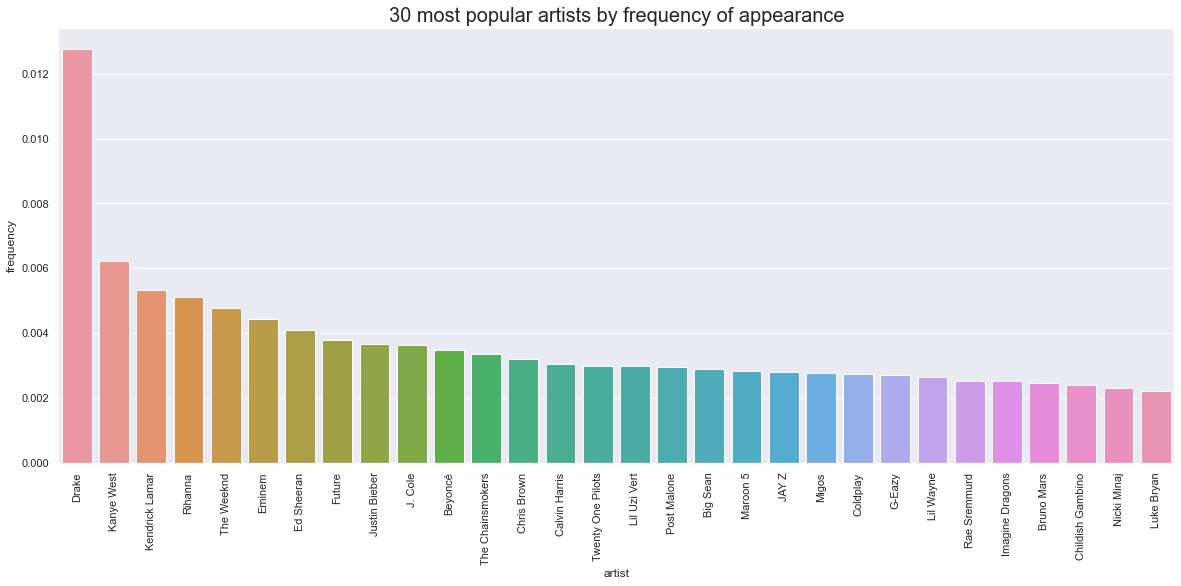

In [217]:
temp_df=pd.DataFrame(artist_freq.head(30))
temp_df.reset_index(level=0, inplace=True)
temp_df.columns.values[0] = "artist"
temp_df.columns.values[1] = "frequency"
plt.figure(figsize = (20,8))
ax = sns.barplot(x="artist",y="frequency" ,data=temp_df)
plt.xticks(rotation=90)
#ax.set_ylabel('lololo')
ax.set_title('30 most popular artists by frequency of appearance',fontsize=20)

In [76]:
all_tracks['song']=all_tracks['artist_name']+": "+all_tracks['track_name']

In [38]:
song_uniqe=all_tracks['song'].nunique()

In [77]:
song_count=all_tracks['song'].value_counts()
song_freq=all_tracks['song'].value_counts(normalize=True)
song_freq.head(10)

Kendrick Lamar: HUMBLE.                       0.000702
Drake: One Dance                              0.000655
DRAM: Broccoli (feat. Lil Yachty)             0.000623
The Chainsmokers: Closer                      0.000619
Post Malone: Congratulations                  0.000603
Aminé: Caroline                               0.000531
KYLE: iSpy (feat. Lil Yachty)                 0.000530
Migos: Bad and Boujee (feat. Lil Uzi Vert)    0.000528
Khalid: Location                              0.000527
Lil Uzi Vert: XO TOUR Llif3                   0.000526
Name: song, dtype: float64

Text(0.5, 1.0, '30 most popular songs by frequency of appearance')

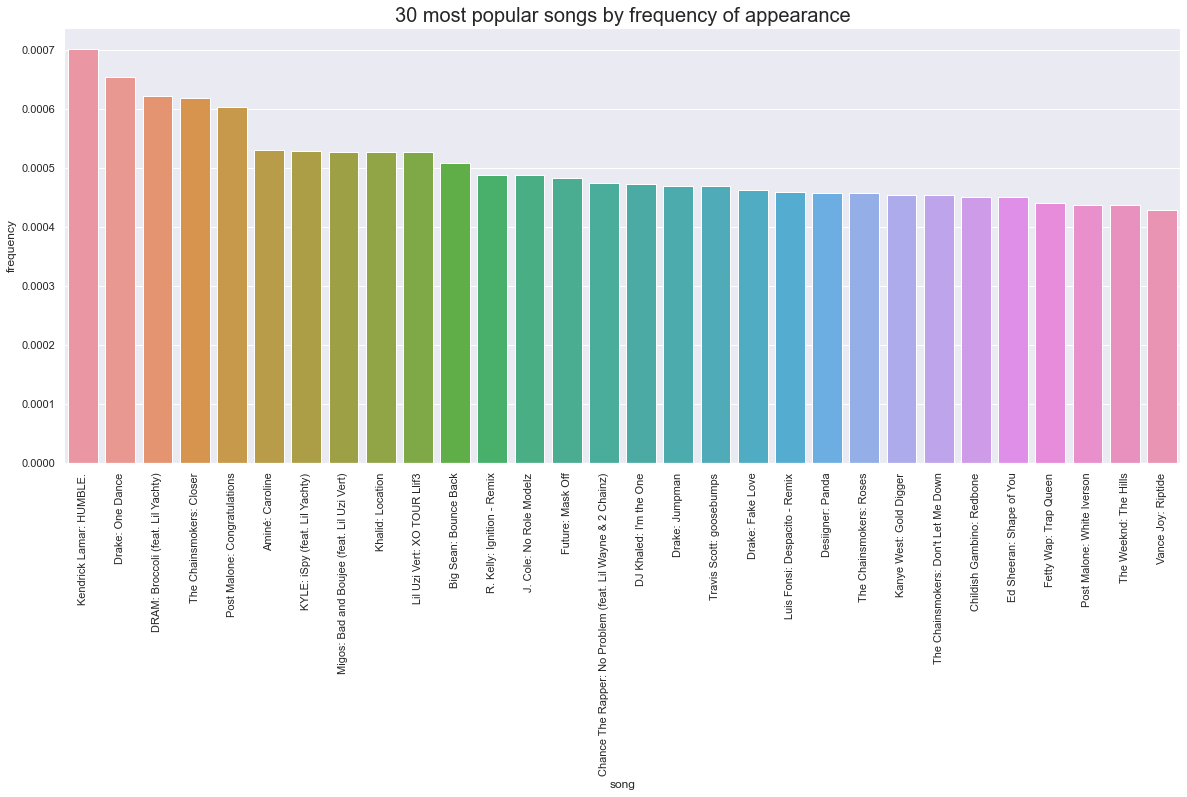

In [215]:
temp_df=pd.DataFrame(song_freq.head(30))
temp_df.reset_index(level=0, inplace=True)
temp_df.columns.values[0] = "song"
temp_df.columns.values[1] = "frequency"
plt.figure(figsize = (20,8))
ax = sns.barplot(x="song",y="frequency" ,data=temp_df)
plt.xticks(rotation=90)
#ax.set_ylabel('lololo')
ax.set_title('30 most popular songs by frequency of appearance',fontsize=20)

In [91]:
list_duration_ms_desc=all_playlists['duration_ms'].describe(include=['int64','float64'])
list_duration_ms_desc

count    1.000000e+06
mean     1.557968e+07
std      1.285643e+07
min      9.753800e+04
25%      5.995383e+06
50%      1.142244e+07
75%      2.143369e+07
max      6.350738e+08
Name: duration_ms, dtype: float64

D:\anaconda\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
D:\anaconda\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5, 1, 'description of playlist duration (minutes)')

<Figure size 1080x576 with 0 Axes>

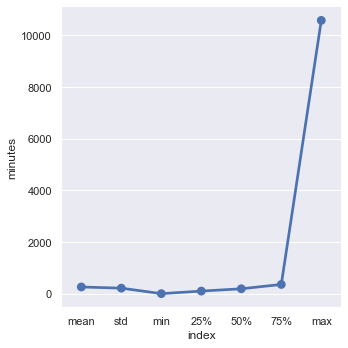

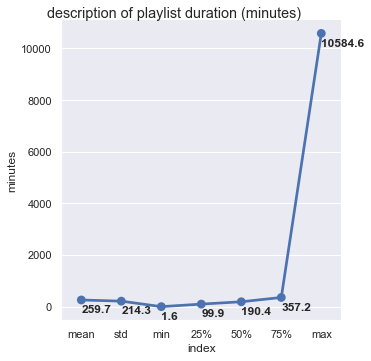

In [210]:
plt.figure(figsize = (15,8))
temp_desc=(list_duration_ms_desc/1000)/60
temp_desc=pd.DataFrame(temp_desc)
temp_desc.reset_index(inplace=True)
temp_desc = temp_desc[temp_desc['index'] != 'count']
temp_desc.reset_index(inplace=True)
num_col = temp_desc._get_numeric_data().columns
temp_desc.columns.values[1] = "index"
temp_desc.columns.values[2] = "minutes"
for i in num_col:
    if i in ['index']:
        continue
    ax=sns.factorplot(x="index", y='minutes', data=temp_desc)

ax.fig.suptitle('description of playlist duration (minutes)')#, fontsize= 25)
#a.set_title('discription of playlist duration (minutes)')
#axx = plt.gca()
for line in range(0,temp_desc.shape[0]):
    plt.text(temp_desc['level_0'][line]-1, temp_desc['minutes'][line]-500, temp_desc['minutes'][line].round(1),weight='semibold')
ax.fig.suptitle('description of playlist duration (minutes)',y=1)#, fontsize= 25)

Text(0.5, 1.0, 'playlist duration [minutes]')

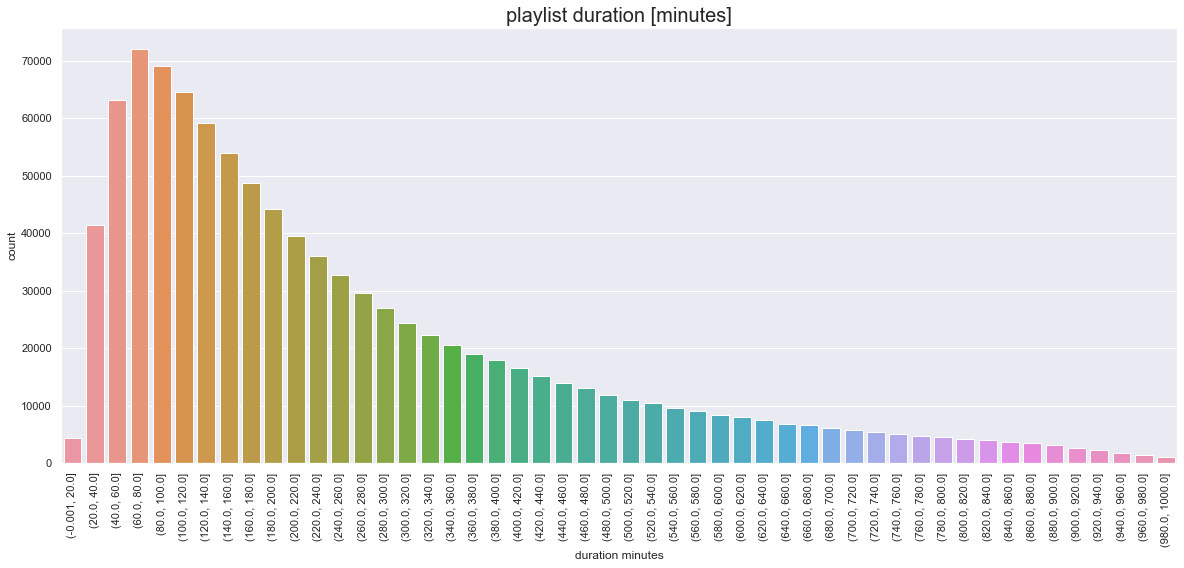

In [343]:
lst = list(np.arange(0,1000+1,20))
out = pd.cut(((all_playlists['duration_ms']/1000)/60), bins=lst, include_lowest=True)
temp_df=pd.DataFrame(out)
temp_df['count']=1
temp_df=temp_df.groupby(['duration_ms']).count()

temp_df.reset_index(level=0, inplace=True)
temp_df.columns.values[0] = "duration_ms"
temp_df.columns.values[1] = "count"

plt.figure(figsize = (20,8))
ax = sns.barplot(x="duration_ms",y="count" ,data=temp_df)
#ax.set_yscale("log")
plt.xticks(rotation=90)
ax.set_ylabel('count')
ax.set_xlabel('duration minutes')
ax.set_title('playlist duration [minutes]',fontsize=20)


In [194]:
list_track_duration_ms_desc=all_tracks['duration_ms'].describe(include=['int64','float64'])
list_track_duration_ms_desc

count    6.634643e+07
mean     2.348231e+05
std      7.455740e+04
min     -1.000000e+00
25%      1.984930e+05
50%      2.250710e+05
75%      2.592930e+05
max      2.074458e+07
Name: duration_ms, dtype: float64

D:\anaconda\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
D:\anaconda\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1080x576 with 0 Axes>

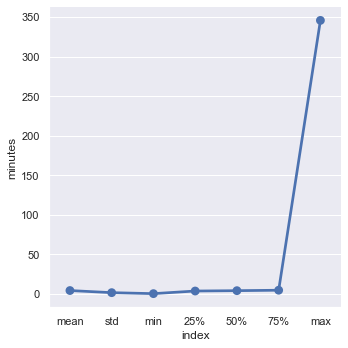

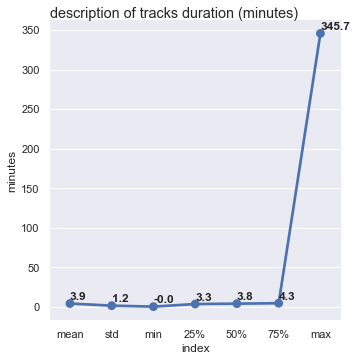

In [211]:
plt.figure(figsize = (15,8))
temp_desc=(list_track_duration_ms_desc/1000)/60
temp_desc=pd.DataFrame(temp_desc)
temp_desc.reset_index(inplace=True)
temp_desc = temp_desc[temp_desc['index'] != 'count']
temp_desc.reset_index(inplace=True)
num_col = temp_desc._get_numeric_data().columns
temp_desc.columns.values[1] = "index"
temp_desc.columns.values[2] = "minutes"
for i in num_col:
    if i in ['index']:
        continue
    ax=sns.factorplot(x="index", y='minutes', data=temp_desc)

ax.fig.suptitle('description of tracks duration (minutes)',y=1)#, fontsize= 25)
#a.set_title('discription of playlist duration (minutes)')
#axx = plt.gca()
for line in range(0,temp_desc.shape[0]):
    plt.text(temp_desc['level_0'][line]-1, temp_desc['minutes'][line]+5, temp_desc['minutes'][line].round(1),weight='semibold')


Text(0.5, 1.0, 'track duration distribution')

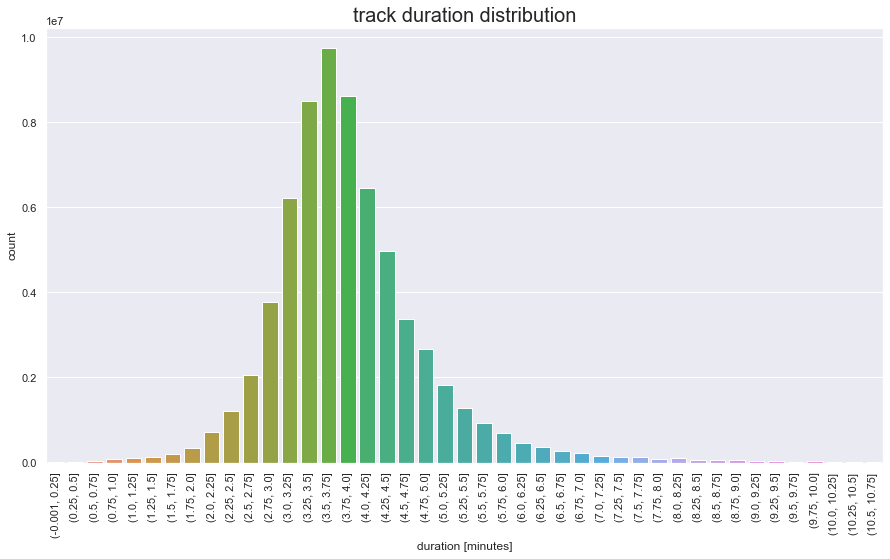

In [357]:
lst = list(np.arange(0,10+1,0.25))
out = pd.cut((all_tracks['duration_ms']/1000)/60, bins=lst, include_lowest=True)
temp_df=pd.DataFrame(out)
temp_df['count']=1
temp_df=temp_df.groupby(['duration_ms']).count()

temp_df.reset_index(level=0, inplace=True)
temp_df.columns.values[0] = "duration_ms"
temp_df.columns.values[1] = "count"

plt.figure(figsize = (15,8))
ax = sns.barplot(x="duration_ms",y="count" ,data=temp_df)
#ax.set_yscale("log")
plt.xticks(rotation=90)
ax.set_ylabel('count')
ax.set_xlabel('duration [minutes]')
ax.set_title('track duration distribution',fontsize=20)


In [25]:
num_tracks_desc=all_playlists['num_tracks'].describe()
num_tracks_desc

count    1000000.000000
mean          66.346428
std           53.669358
min            5.000000
25%           26.000000
50%           49.000000
75%           92.000000
max          376.000000
Name: num_tracks, dtype: float64

D:\anaconda\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
D:\anaconda\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1080x576 with 0 Axes>

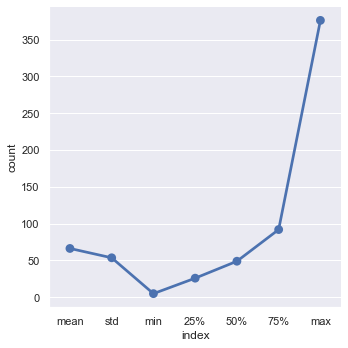

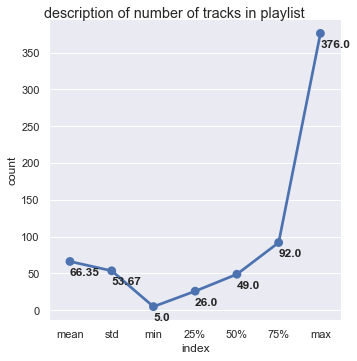

In [212]:
plt.figure(figsize = (15,8))
temp_desc=(num_tracks_desc)
temp_desc=pd.DataFrame(temp_desc)
temp_desc.reset_index(inplace=True)
temp_desc = temp_desc[temp_desc['index'] != 'count']
temp_desc.reset_index(inplace=True)
num_col = temp_desc._get_numeric_data().columns
yaxis="count"
temp_desc.columns.values[1] = "index"
temp_desc.columns.values[2] = yaxis
for i in num_col:
    if i in ['index']:
        continue
    ax=sns.factorplot(x="index", y=yaxis, data=temp_desc)

ax.fig.suptitle('description of number of tracks in playlist',y=1)#, fontsize= 25)
#a.set_title('discription of playlist duration (minutes)')
#axx = plt.gca()
for line in range(0,temp_desc.shape[0]):
    plt.text(temp_desc['level_0'][line]-1, temp_desc[yaxis][line]-19, temp_desc[yaxis][line].round(2),horizontalalignment='left', weight='semibold')


Text(0.5, 1.0, 'num_tracks in playlist')

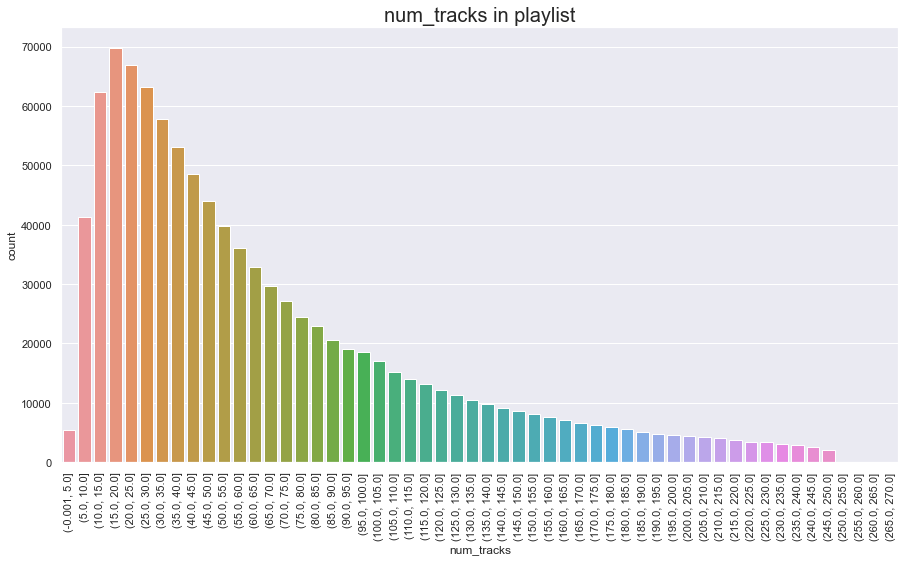

In [363]:
lst = list(np.arange(0,270+1,5))
out = pd.cut(all_playlists['num_tracks'], bins=lst, include_lowest=True)
temp_df=pd.DataFrame(out)
temp_df['count']=1
temp_df=temp_df.groupby(['num_tracks']).count()

temp_df.reset_index(level=0, inplace=True)
temp_df.columns.values[0] = "num_tracks"
temp_df.columns.values[1] = "count"

plt.figure(figsize = (15,8))
ax = sns.barplot(x="num_tracks",y="count" ,data=temp_df)
#ax.set_yscale("log")
plt.xticks(rotation=90)
ax.set_ylabel('count')
ax.set_xlabel('num_tracks')
ax.set_title('num_tracks in playlist',fontsize=20)


In [218]:
num_artists_desc=all_playlists['num_artists'].describe()

D:\anaconda\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
D:\anaconda\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1080x576 with 0 Axes>

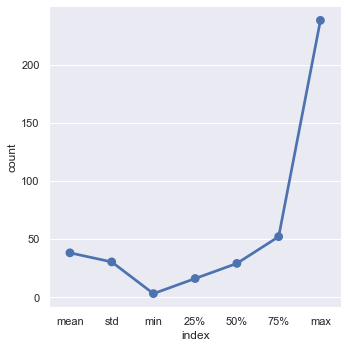

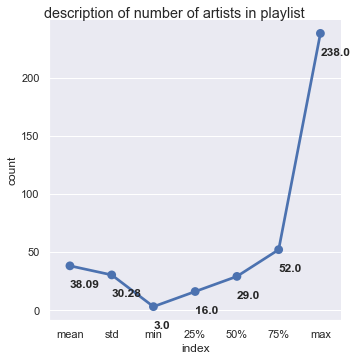

In [220]:
plt.figure(figsize = (15,8))
temp_desc=(num_artists_desc)
temp_desc=pd.DataFrame(temp_desc)
temp_desc.reset_index(inplace=True)
temp_desc = temp_desc[temp_desc['index'] != 'count']
temp_desc.reset_index(inplace=True)
num_col = temp_desc._get_numeric_data().columns
yaxis="count"
temp_desc.columns.values[1] = "index"
temp_desc.columns.values[2] = yaxis
for i in num_col:
    if i in ['index']:
        continue
    ax=sns.factorplot(x="index", y=yaxis, data=temp_desc)

ax.fig.suptitle('description of number of artists in playlist',y=1)#, fontsize= 25)
#a.set_title('discription of playlist duration (minutes)')
#axx = plt.gca()
for line in range(0,temp_desc.shape[0]):
    plt.text(temp_desc['level_0'][line]-1, temp_desc[yaxis][line]-19, temp_desc[yaxis][line].round(2),horizontalalignment='left', weight='semibold')


Text(0.5, 1.0, 'num_artists in playlist distribution')

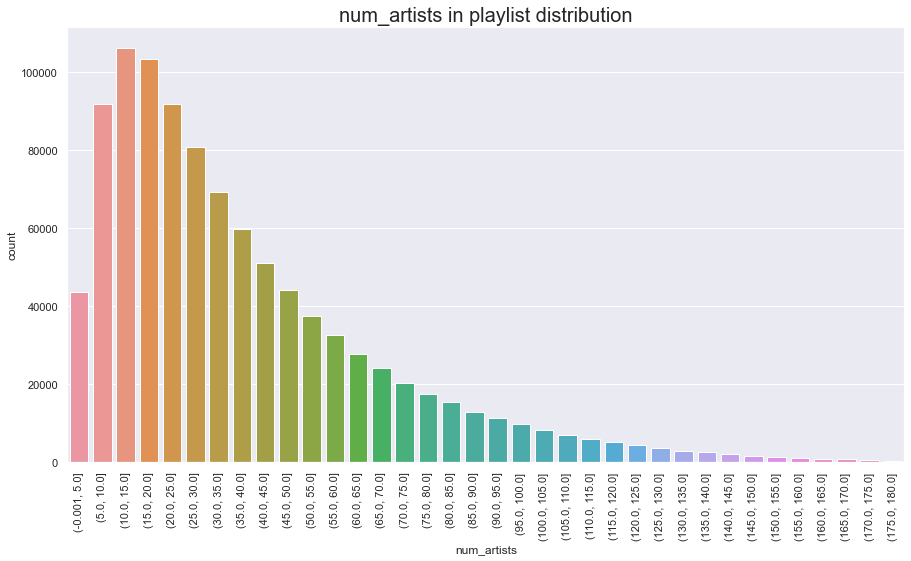

In [361]:
lst = list(np.arange(0,180+1,5))
out = pd.cut(all_playlists['num_artists'], bins=lst, include_lowest=True)
temp_df=pd.DataFrame(out)
temp_df['count']=1
temp_df=temp_df.groupby(['num_artists']).count()

temp_df.reset_index(level=0, inplace=True)
temp_df.columns.values[0] = "num_artists"
temp_df.columns.values[1] = "count"

plt.figure(figsize = (15,8))
ax = sns.barplot(x="num_artists",y="count" ,data=temp_df)
#ax.set_yscale("log")
plt.xticks(rotation=90)
ax.set_ylabel('count')
ax.set_xlabel('num_artists')
ax.set_title('num_artists in playlist distribution',fontsize=20)


Text(0.5, 1.0, 'log(count) num_artists in playlist')

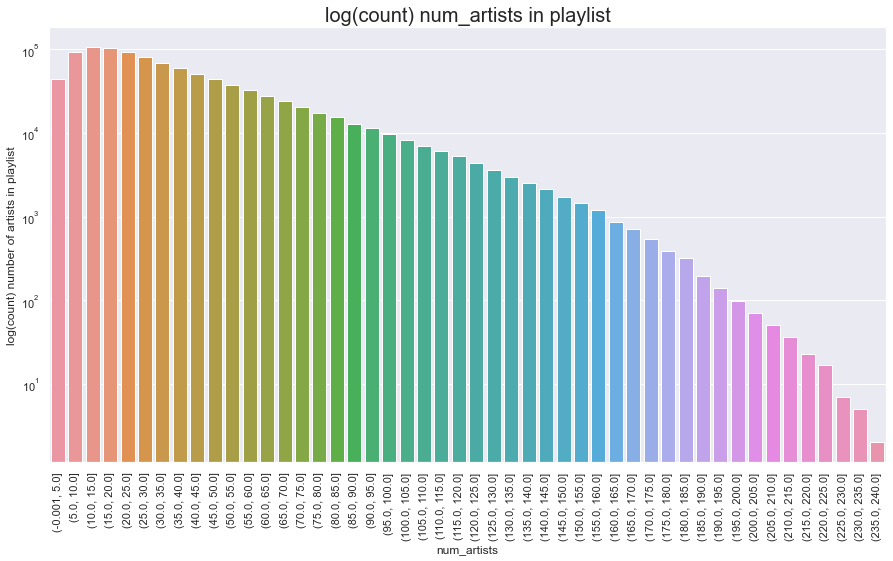

In [354]:
lst = list(np.arange(0,240+1,5))
out = pd.cut(all_playlists['num_artists'], bins=lst, include_lowest=True)
temp_df=pd.DataFrame(out)
temp_df['count']=1
temp_df=temp_df.groupby(['num_artists']).count()

temp_df.reset_index(level=0, inplace=True)
temp_df.columns.values[0] = "num_artists"
temp_df.columns.values[1] = "count"

plt.figure(figsize = (15,8))
ax = sns.barplot(x="num_artists",y="count" ,data=temp_df)
ax.set_yscale("log")
plt.xticks(rotation=90)
ax.set_ylabel('log(count) number of artists in playlist')
ax.set_xlabel('num_artists')
ax.set_title('log(count) num_artists in playlist',fontsize=20)


Text(0.5, 1.0, 'number of edits for playlists in log scale')

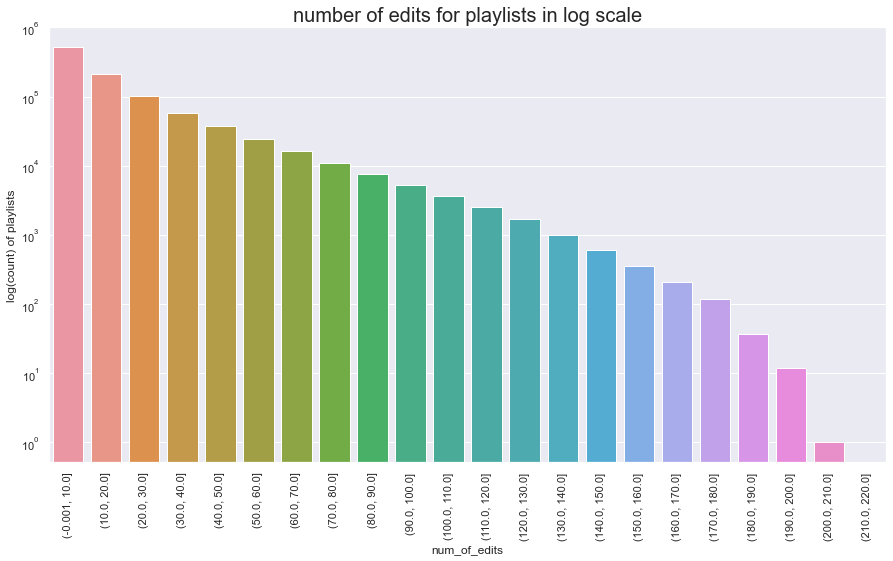

In [333]:
lst = list(np.arange(0,220+1,10))
out = pd.cut(all_playlists['num_edits'], bins=lst, include_lowest=True)
temp_df=pd.DataFrame(out)
temp_df['count']=1
temp_df=temp_df.groupby(['num_edits']).count()

temp_df.reset_index(level=0, inplace=True)
temp_df.columns.values[0] = "num_of_edits"
temp_df.columns.values[1] = "count"

plt.figure(figsize = (15,8))
ax = sns.barplot(x="num_of_edits",y="count" ,data=temp_df)
ax.set_yscale("log")
plt.xticks(rotation=90)
ax.set_ylabel('log(count) of playlists')
ax.set_title('number of edits for playlists in log scale',fontsize=20)


In [221]:
num_edits_desc=all_playlists['num_edits'].describe()

D:\anaconda\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
D:\anaconda\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1080x576 with 0 Axes>

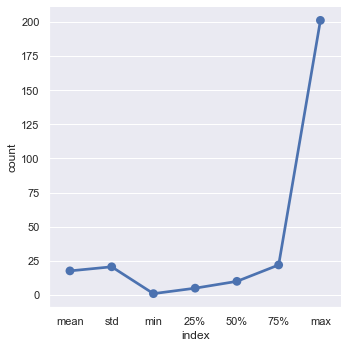

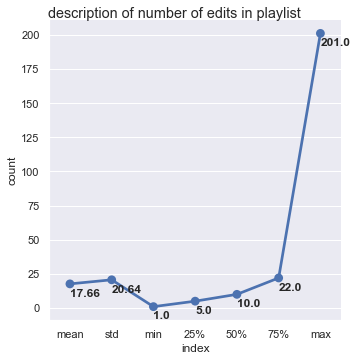

In [224]:
plt.figure(figsize = (15,8))
temp_desc=(num_edits_desc)
temp_desc=pd.DataFrame(temp_desc)
temp_desc.reset_index(inplace=True)
temp_desc = temp_desc[temp_desc['index'] != 'count']
temp_desc.reset_index(inplace=True)
num_col = temp_desc._get_numeric_data().columns
yaxis="count"
temp_desc.columns.values[1] = "index"
temp_desc.columns.values[2] = yaxis
for i in num_col:
    if i in ['index']:
        continue
    ax=sns.factorplot(x="index", y=yaxis, data=temp_desc)

ax.fig.suptitle('description of number of edits in playlist',y=1)#, fontsize= 25)
#a.set_title('discription of playlist duration (minutes)')
#axx = plt.gca()
for line in range(0,temp_desc.shape[0]):
    plt.text(temp_desc['level_0'][line]-1, temp_desc[yaxis][line]-9, temp_desc[yaxis][line].round(2),horizontalalignment='left', weight='semibold')


In [225]:
num_follower_desc=all_playlists['num_followers'].describe()

D:\anaconda\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
D:\anaconda\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1080x576 with 0 Axes>

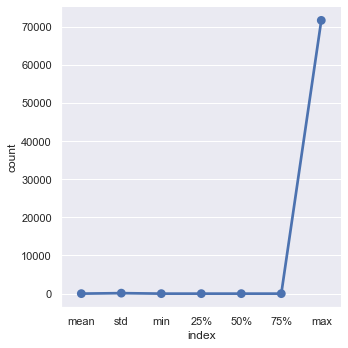

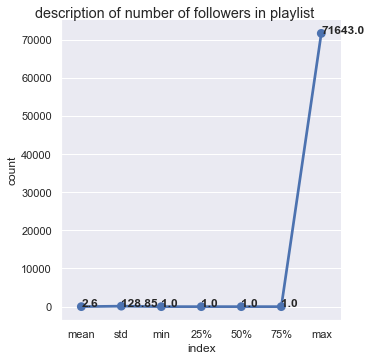

In [226]:
plt.figure(figsize = (15,8))
temp_desc=(num_follower_desc)
temp_desc=pd.DataFrame(temp_desc)
temp_desc.reset_index(inplace=True)
temp_desc = temp_desc[temp_desc['index'] != 'count']
temp_desc.reset_index(inplace=True)
num_col = temp_desc._get_numeric_data().columns
yaxis="count"
temp_desc.columns.values[1] = "index"
temp_desc.columns.values[2] = yaxis
for i in num_col:
    if i in ['index']:
        continue
    ax=sns.factorplot(x="index", y=yaxis, data=temp_desc)

ax.fig.suptitle('description of number of followers in playlist',y=1)#, fontsize= 25)
#a.set_title('discription of playlist duration (minutes)')
#axx = plt.gca()
for line in range(0,temp_desc.shape[0]):
    plt.text(temp_desc['level_0'][line]-1, temp_desc[yaxis][line]-9, temp_desc[yaxis][line].round(2),horizontalalignment='left', weight='semibold')


Text(0.5, 1.0, 'num_followers for playlist distribution')

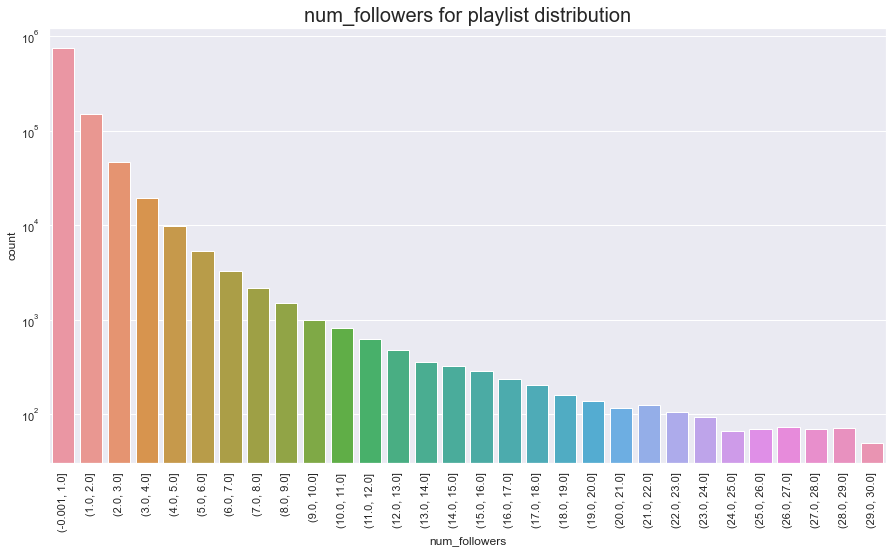

In [370]:
lst = list(np.arange(0,30+1,1))
out = pd.cut(all_playlists['num_followers'], bins=lst, include_lowest=True)
temp_df=pd.DataFrame(out)
temp_df['count']=1
temp_df=temp_df.groupby(['num_followers']).count()

temp_df.reset_index(level=0, inplace=True)
temp_df.columns.values[0] = "num_followers"
temp_df.columns.values[1] = "count"

plt.figure(figsize = (15,8))
ax = sns.barplot(x="num_followers",y="count" ,data=temp_df)
ax.set_yscale("log")
plt.xticks(rotation=90)
ax.set_ylabel('count')
ax.set_xlabel('num_followers')
ax.set_title('num_followers for playlist distribution',fontsize=20)


In [281]:
num_followers_count=all_playlists['num_followers'].value_counts()

In [236]:
num_followers_count_df=pd.DataFrame(num_followers_count)
num_followers_count_df.reset_index(inplace=True)
num_followers_count_df.columns.values[1] = "count"
num_followers_count_df.columns.values[0] = "num_followers"
num_followers_count_df=num_followers_count_df.sort_values(by="num_followers")

,num_followers,count
0,1,754219
1,2,149600
2,3,46939
3,4,19591
4,5,9813
...,...,...
394,27830,1
512,31539,1
618,45942,1
379,53519,1


Text(0.5, 1.0, 'the log(count) number of playlist by number of followers ')

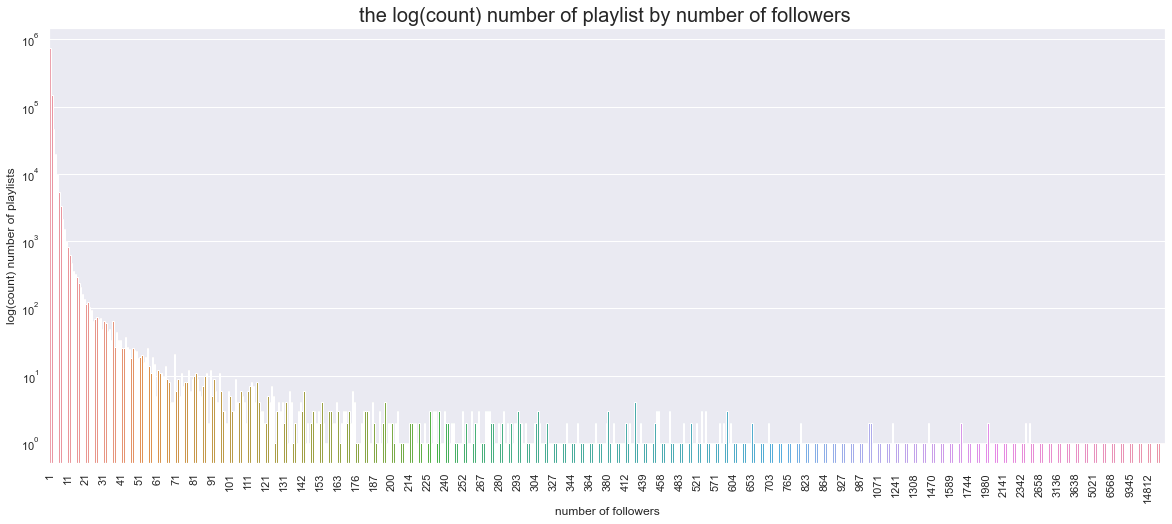

In [262]:
temp_df=pd.DataFrame(num_followers_count_df.head(7000))
temp_df.reset_index(level=0, inplace=True)
temp_df.columns.values[0] = "num_followers"
temp_df.columns.values[1] = "count"
plt.figure(figsize = (20,8))
ax = sns.barplot(x="num_followers",y="count" ,data=num_followers_count_df)
ax.set_yscale("log")
plt.xticks(rotation=90)
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
ax.set_xlabel('number of followers')
ax.set_ylabel('log(count) number of playlists')
ax.set_title('the log(count) number of playlist by number of followers ',fontsize=20)

In [263]:
description_count=all_playlists['description'].value_counts()

Text(0.5, 1.0, "30 most popular descriptions by count of appearance \n note that '&lt;3' means '<3' which is a heart sign \n 98% of the playlists had no description")

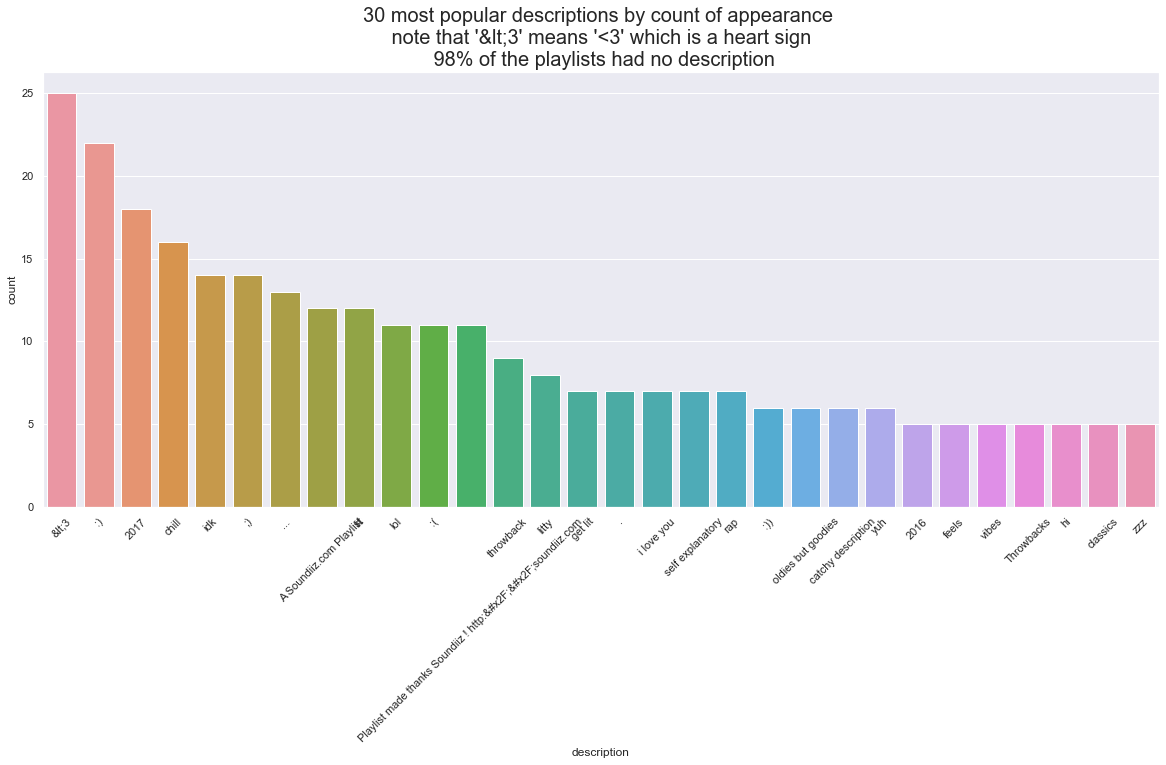

In [272]:
temp_df=pd.DataFrame(description_count.head(30))
temp_df.reset_index(level=0, inplace=True)
temp_df.columns.values[0] = "description"
temp_df.columns.values[1] = "count"
plt.figure(figsize = (20,8))
ax = sns.barplot(x="description",y="count" ,data=temp_df)
plt.xticks(rotation=45)
#ax.set_ylabel('lololo')
ax.set_title('30 most popular descriptions by count of appearance \n note that \'&lt;3\' means \'<3\' which is a heart sign \n 98% of the playlists had no description', fontsize=20)

In [200]:
all_tracks['artist_album']=all_tracks['artist_name']+":"+all_tracks['album_name']

In [201]:
album_name_count=all_tracks['artist_album'].value_counts()
album_name_count.head(10)

Drake:Views                             208533
Post Malone:Stoney                      156488
Drake:More Life                         141701
Kendrick Lamar:DAMN.                    141638
The Weeknd:Beauty Behind The Madness    136517
Chance The Rapper:Coloring Book         133050
Khalid:American Teen                    120946
Migos:Culture                           120017
Justin Bieber:Purpose                   114885
Kanye West:The Life Of Pablo            113024
Name: artist_album, dtype: int64

In [202]:
album_name_freq=all_tracks['artist_album'].value_counts(normalize=True)
album_name_freq.head(10)

Drake:Views                             0.003143
Post Malone:Stoney                      0.002359
Drake:More Life                         0.002136
Kendrick Lamar:DAMN.                    0.002135
The Weeknd:Beauty Behind The Madness    0.002058
Chance The Rapper:Coloring Book         0.002005
Khalid:American Teen                    0.001823
Migos:Culture                           0.001809
Justin Bieber:Purpose                   0.001732
Kanye West:The Life Of Pablo            0.001704
Name: artist_album, dtype: float64

Text(0.5, 1.0, '30 most popular albums by frequency of appearance')

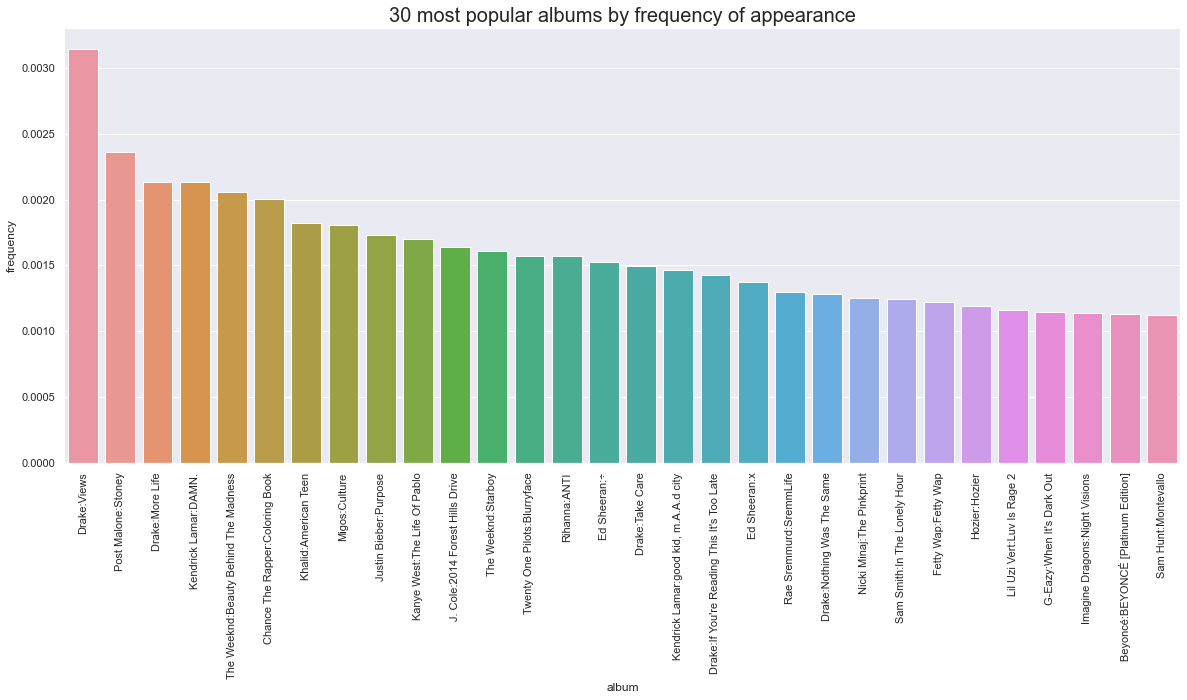

In [213]:
temp_df=pd.DataFrame(album_name_freq.head(30))
temp_df.reset_index(level=0, inplace=True)
temp_df.columns.values[0] = "album"
temp_df.columns.values[1] = "frequency"
plt.figure(figsize = (20,8))
ax = sns.barplot(x="album",y="frequency" ,data=temp_df)
plt.xticks(rotation=90)
#ax.set_ylabel('lololo')
ax.set_title('30 most popular albums by frequency of appearance', fontsize=20)

In [205]:
playlist_names_count=all_playlists['name'].value_counts()
playlist_names_freq=all_playlists['name'].value_counts(normalize=True)


Text(0.5, 1.0, '30 most popular playlist names by frequency of appearance')

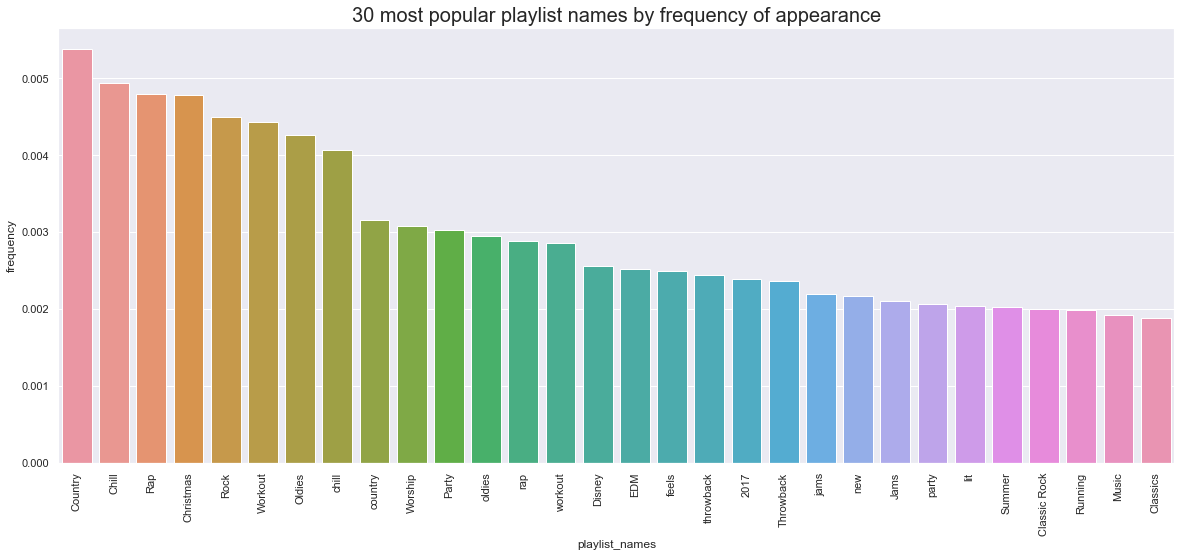

In [214]:
temp_df=pd.DataFrame(playlist_names_freq.head(30))
temp_df.reset_index(level=0, inplace=True)
temp_df.columns.values[0] = "playlist_names"
temp_df.columns.values[1] = "frequency"
plt.figure(figsize = (20,8))
ax = sns.barplot(x="playlist_names",y="frequency" ,data=temp_df)
plt.xticks(rotation=90)
#ax.set_ylabel('lololo')
ax.set_title('30 most popular playlist names by frequency of appearance',fontsize=20)